In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
churn_data = pd.read_csv('/home/elliot/PycharmProjects/CSC 495 - Telecom Customer Churn/Datasets/telecom_churn_Processed.csv')

X = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

In [4]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [5]:
y_pred_svc = svc.predict(X_test)
y_pred_train = svc.predict(X_train)

svc_train_as = metrics.accuracy_score(y_train, y_pred_train)
svc_as = metrics.accuracy_score(y_test, y_pred_svc)


In [6]:
print(f"Accuracy score for test data : {svc_as}")
print(f"Accuracy score for train data : {svc_train_as}")


Accuracy score for test data : 0.7371822490305903
Accuracy score for train data : 0.73275313097007


In [7]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1711
           1       0.00      0.00      0.00       610

    accuracy                           0.74      2321
   macro avg       0.37      0.50      0.42      2321
weighted avg       0.54      0.74      0.63      2321



In [8]:
# Now we Scale the data
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [9]:
svc_sc = SVC()
svc_sc.fit(X_train_sc, y_train)

y_pred_sc = svc_sc.predict(X_test_sc)
y_pred_sc_train = svc_sc.predict(X_train_sc)

svc_sc_train_as = metrics.accuracy_score(y_train, y_pred_sc_train)
svc_sc_as = metrics.accuracy_score(y_test, y_pred_sc)


In [10]:
print(f"Accuracy score for test data : {svc_sc_as}")
print(f"Accuracy score for train data : {svc_sc_train_as}")

Accuracy score for test data : 0.7949159844894442
Accuracy score for train data : 0.8227552536616429


In [11]:
params = {'kernel' : ['rbf'], 'C' : [0.1, 1, 5, 10], 'gamma' : [0.01, 0.1, 0.9, 1]}

grid = GridSearchCV(SVC(), params, cv = 5, return_train_score= False)


In [12]:
svc_new = SVC(C = 1, gamma = 0.01, kernel = 'rbf')
svc_new.fit(X_train_sc, y_train)

y_pred_new = svc_new.predict(X_test_sc)
y_pred_new_train = svc_new.predict(X_train_sc)

svc_new_train_as = metrics.accuracy_score(y_train, y_pred_new_train)
svc_new_as = metrics.accuracy_score(y_test, y_pred_new)

print(f"Accuracy score for test data : {svc_new_as}")
print(f"Accuracy score for train data : {svc_new_train_as}")


Accuracy score for test data : 0.7962085308056872
Accuracy score for train data : 0.8106559116960306


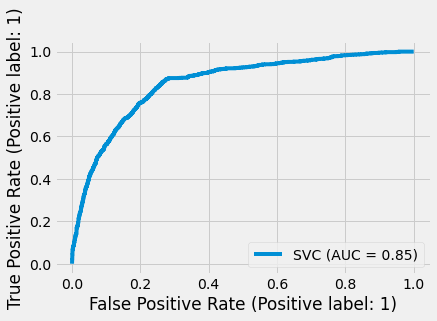

In [13]:
metrics.plot_roc_curve(svc_new, X_train_sc, y_train)
